In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import laser
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import integrate

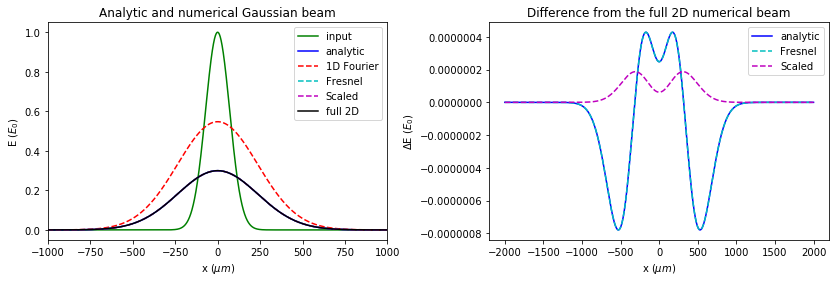

In [2]:
# The fft algorithm is significantly faster for powers of 2
Nx = 2**12
X = 4e3
x = np.linspace(-X/2, X/2, Nx, False)
Z = 1e5
z = [0, Z]

w0 = 100
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E = np.exp(-x**2 / w0**2)
# Sqrt is because we are in 1D
EE = (w0 / wZ) * np.exp(-x**2 / wZ**2)

# 1D R-S transfer function for 1D field
Efourier = np.transpose(abs(laser.fourier_prop(E, x, z, 1)))
# 2D Fresnel transfer function for x-y symmetric, seperable 2D field
Efresnel = np.transpose(abs(laser.fresnel_prop(E, x, z, 1)))
# Scaled 1D R-S to approximate 2D
EfourierS = np.transpose(abs(laser.scale_fourier(laser.fourier_prop(E, x, z, 1))))
# Full 2D calculation
Ny = Nx
Y = X
y = np.linspace(-Y/2, Y/2, Ny, False)
E2 = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
E2D = np.transpose(abs(laser.fourier_prop2(E2, x, y, z, 1))[:, :, int(Ny/2)])


plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
plt.plot(x, E, 'g-', x, EE, 'b-', x, Efourier[:, 1],
         'r--', x, Efresnel[:, 1], 'c--', x, EfourierS[:, 1], 'm--',  x, E2D[:, 1], 'k-')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r'E ($E_0$)')
plt.title('Analytic and numerical Gaussian beam')
plt.legend(['input', 'analytic', '1D Fourier', 'Fresnel', 'Scaled', 'full 2D'])
plt.xlim([-1e3, 1e3])

plt.subplot(122)
plt.plot(x, EE-E2D[:, 1], 'b-', x, Efresnel[:, 1]-E2D[:, 1], 'c--', x, EfourierS[:, 1]-E2D[:, 1], 'm--')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r'$\Delta$E ($E_0$)')
plt.title('Difference from the full 2D numerical beam')
plt.legend(['analytic', 'Fresnel', 'Scaled'])
plt.show()

In [2]:
# Test of a axicon lens
Nx = 2**10
X = 8000
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = X
y = np.linspace(-Y/2, Y/2, Ny, False)
# z after lens
Nz = 2**8
Z = 1e6
z = np.linspace(0, Z, Nz)

w0 = 2e3
alpha = np.radians(0.5)
# Gaussian beam
E = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
# Axicon lens
E = E * np.exp(-1j*np.pi*alpha*np.sqrt(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2))
E2D = np.flipud(np.transpose(abs(laser.fourier_prop2(E, x, y, z, 1)[:, :, int(Ny/2)])))

# Fresnel propagator - Axicon phase isn't seperable so need full 3D fourier propagator to model it
E = np.exp(-x**2 / w0**2)
E = E * np.exp(-1j*np.pi*alpha*abs(x))
Efresnel = np.transpose(abs(laser.fresnel_prop(E, x, z, 1)))

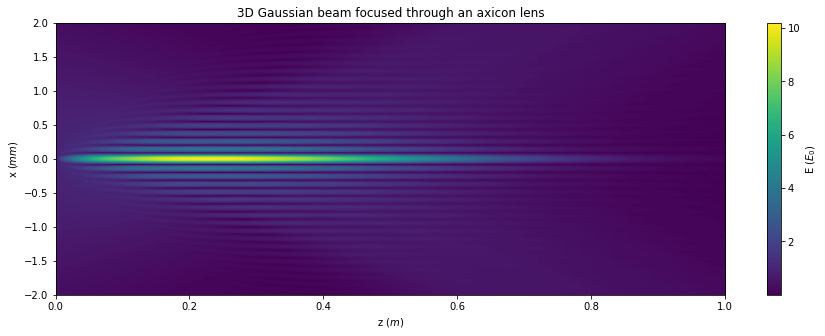

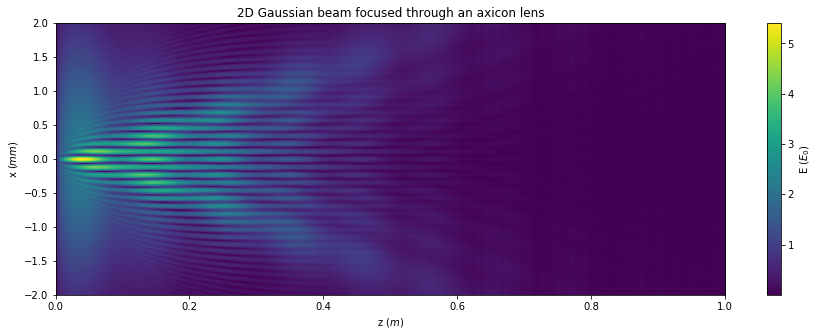

In [3]:
plt.figure(figsize=(15, 5))
plt.imshow(E2D, aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('3D Gaussian beam focused through an axicon lens')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(Efresnel, aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('2D Gaussian beam focused through an axicon lens')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])
plt.show()